In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


In [110]:
data=pd.read_csv(r"C:\Users\jithi\Desktop\Vinu DSA\titanic_dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [112]:
data.shape

(891, 12)

In [113]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [114]:
data.isna().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#age col has 177 null values,cabin has 687,Embarked as 2


In [115]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


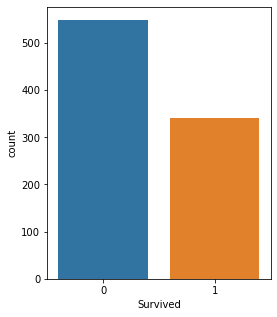

In [116]:
plt.figure(figsize=(4, 5))
sns.countplot(x='Survived', data=data)
plt.show()

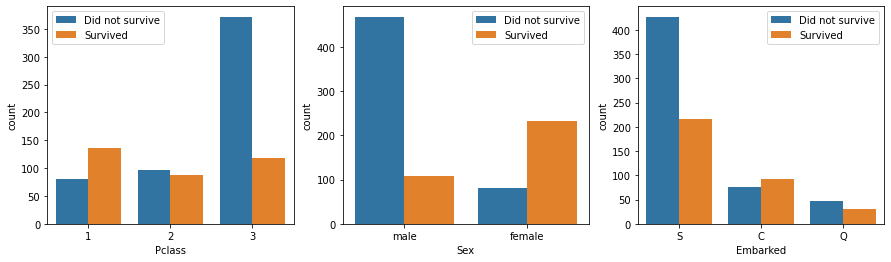

In [117]:

cat_cols = ['Pclass', 'Sex', 'Embarked']
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for ind, val in enumerate(cat_cols):
    sns.countplot(x=val, hue='Survived', data=data, ax=ax[ind])
    ax[ind].legend(['Did not survive', 'Survived'])

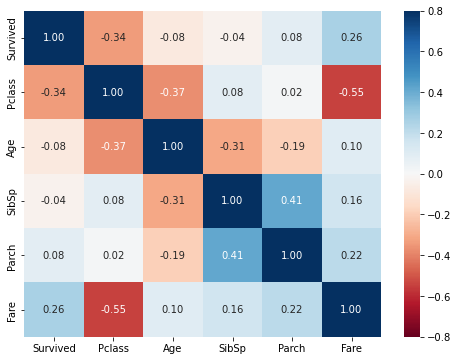

In [118]:

plt.figure(figsize=(8, 6))
data_corr = data.drop('PassengerId', axis=1).corr()
sns.heatmap(data_corr, annot=True, fmt='.2f', cmap='RdBu', vmax=0.8, vmin=-0.8)
plt.show()

In [119]:
#data.drop(['Cabin'],inplace=True)
data.drop(columns=['Cabin'],inplace=True)


In [120]:
data.fillna({'Age':data['Age'].median(),'Embarked':data['Embarked'].mode()[0]},inplace=True)
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [121]:
data1=data.copy()
data1.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [122]:
data1['Sex']=data1['Sex'].replace(['male','female'],[0,1])
data1['Embarked']=data1['Embarked'].replace(['S','C','Q'],[0,1,2])

In [123]:
#StandardScaling
from sklearn import preprocessing
standardise=preprocessing.StandardScaler()
data[['Age']]=standardise.fit_transform(data[['Age']])

In [ ]:
#GaussianNB Classifier

In [124]:
y = data1['Survived']
X = data1.drop('Survived', axis=1)

In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [126]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train,y_train)
y_pred=NB_model.predict(X_test)

In [127]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print("Accuracy is:",round(accuracy_score(y_test,y_pred),3))


[[85 20]
 [20 54]]
Accuracy is: 0.777


In [129]:
#Hypertuning
from sklearn.naive_bayes import BernoulliNB
classifier = BernoulliNB()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [130]:
accuracy_score(y_test,y_pred)

0.7821229050279329

In [131]:
matrix=confusion_matrix(y_pred,y_test)
matrix

array([[88, 22],
       [17, 52]], dtype=int64)

In [132]:
#There is no change in accuracy after hyperparameter tuning.